# Introduction

When living in a large city, there are many important things to know such as the rent price you can 
expect, cost of living, salaries, the culture, and many more. According to the website youmoveme,
some of the largest concerns people should keep in mind are school reviews, commute time, and 
safety [1]. For this project, we will be analyzing crime in Calgary since it may become the place 
where we live for the next few years. Of all the items listed above to know about a city, it is a bit 
harder to tell the safety of a city unless you actually see the crimes in person. The significance of 
this project is to visualize crime in Calgary to help people either moving to Calgary or thinking of 
making it their long-term home.

Understanding the safety of a large city can be tough unless you actually see the crimes happening 
in front of you. However, Open Calgary [2], has datasets on important topics within Calgary such 
as crime. However, how often do they occur? What crimes are happening more frequently? And 
where are those crimes taking place? These are some of the questions that someone might have
when think about crimes happening in Calgary. This document centers its attention to analyze the 
dataset Community_Crime_Statistics [3] from open Calgary and we aim to understand the 
behaviors of crimes occurring. By the end of the analysis, we will be able to present our findings 
to anyone thinking of moving to or living in Calgary to help them understand everything they need 
to know about crime in Calgary from the years 2018 to 2023. Our domain for this project will 
mainly be Calgary however, for our final analysis, we will draw a few simple comparisons to other 
cities across Canada and the USA. We cannot truly inform someone of how safe or unsafe Calgary 
is unless we make a comparison to another city, but we will only make those comparisons at the 
very end of our project and for a very small part. 


# Dataset
The data set we will use in this project is called Community_Crime_Statistics [3], which is found 
on Open Calgary [2]. The mentioned dataset holds information about crimes that occurred in 
Calgary from the years 2018 to the current year. Our dataset has data from the current month but
since 2024 is not fully complete, we will mainly be focusing on comparing the years from 2018 to 
2023. The dataset contains five key columns:

**Community:** This column captures the specific Calgary community where the crime has occurred. 
There are over 200 communities in Calgary and most of them are shown in this dataset. Not only 
are we going to find the safest and most unsafe communities, but we will also be putting each 
community from our dataset into sectors such as northeast, south, west, etc. When you live in a 
city, you will spend the most amount of time in your community and those nearest to yours so 
understanding the safety of the sector you are in is very important. For us to identify which
community belongs in what sector, we will be using a secondary dataset called 
Community_Sectors [4], also obtained from Open Calgary. 

**Category:** This column contains the description of crimes. Currently there are nine crime 
categories, which are: Assault (Non-domestic), Break & Enter – Commercial, Break & Enter –
Dwelling, Break & Enter - Other Premises, Commercial Robbery, Street Robbery, Theft FROM 
Vehicle, Theft OF Vehicle, Violence ‘Other' (Non-domestic). These have been identified as violent 
crime offences by the Centre for Canadian Justice excluding domestic violence. Most of these 
categories are self-explanatory, however it should be noted that the category break & enter includes 
attempts as well.

**Count:** This column contains the crimes counts that happened per each data row entry. Since our 
dataset is updated monthly, the count captures if there are multiple of the same crimes in each
month. Rather than having each row represent a new crime, each row represents a specific category 
of a month. 

**Month:** This column contains the month when the crime occurred. Its values are numeric, and it 
goes from 1 to 12 where 1 is January and 12 is December. 

**Year:** This column contains the year when the crime occurred. Its values are numeric, and it goes 
from 2018 to 2024. For the current year the months are updated till the month of August.
The dataset contains 71,906 rows which means that at a minimum, there have been 71,906 violent 
crimes (excluding domestic assault) from 2018 to August 2024. However, since each row can 
contain multiple crimes, there are many more crimes. 

When visiting the dataset on Open Calgary’s website, they have a section on terms of use under 
the license/attribution section. It is stated that we are encouraged to use the information as long as 
we acknowledge the source of the information. We are free to modify, distribute, and use the 
information in any way for any purpose by doing so.

## Question 1: Which area has the highest and lowest crime rate?
Residents should be knowledgeable of which areas of the city have high or low crime rates to make
daily decisions. It can influence where people choose to live, work, and raise their families. Those
living in high-crime areas might like to understand the causes and possible solutions, whilst those
living in low-crime areas may want to ensure their community's safety. It can additionally inform
local businesses about places where they may feel at ease investing in or opening businesses.
Lastly, tackling this question will enable law enforcement personnel to effectively allocate
resources. High-crime areas may demand additional parole, but low-crime areas can offer models
for crime prevention initiatives.

For the first section, we have focused on the below points for the crime data analysis in the city of Calgary.

Find which area has the highest and lowest Crime.

* There are seven sectors in the city of Calgary which are CENTRE, EAST, NORTH, NORTHEAST, NORTHWEST,SOUTH, SOUTHEAST, WEST.

Determine which community has the highest crime for particular sector.

* There are over 200 communities in Calgary and most of them are shown in this dataset. As we have two files for this project i.e Community_Crime_Statistics and Community_Sectors. We have created a data structure by mapping each community to their particular sector. 


Identify the most common type of crime committed in each sector of Calgary.

* There are nine crime categories, which are: Assault (Non-domestic), Break & Enter – Commercial, Break & Enter – Dwelling, Break & Enter -1
Other Premises, Commercial Robbery, Street Robbery, Theft FROM Vehicle, Theft OF Vehicle, Violence‘Other’ (Non-domestic). 

### Dataset
For the crime data analysis we are using Community_Crime_Statistics.csv and Community_Sectors.csv files in this project as dataset. We can see that the file Community_Crime_Statistics contains the five columns i.e Community, Category, Crime count, Year and month. The files Community_Sectors contains the three columns i.e Sector, Communuties and Polygon.  

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

community_crimes = pd.read_csv("Community_Crime_Statistics.csv") 
community_crimes.head(10)

,Community,Category,Crime Count,Year,Month
0,01B,Assault (Non-domestic),1,2022,11
1,01B,Break & Enter - Commercial,1,2019,6
2,01B,Break & Enter - Commercial,1,2019,8
3,01B,Break & Enter - Commercial,2,2020,3
4,01B,Break & Enter - Commercial,2,2020,7
5,01B,Break & Enter - Commercial,1,2020,8
6,01B,Break & Enter - Commercial,1,2020,11
7,01B,Break & Enter - Commercial,1,2020,12
8,01B,Break & Enter - Commercial,1,2022,7
9,01B,Break & Enter - Commercial,1,2023,8


In [53]:
community_sectors = pd.read_csv('Community_Sectors.csv')
print (community_sectors.head(10))

        Sector                                        Communities  \
0        SOUTH  FISH CREEK PARK,LEGACY,WOODBINE,KELVIN GROVE,L...   
1          NaN                                                NaN   
2          NaN                                                NaN   
3     9.78E+11                  -114.035481443413 50.978186670482   
4    SOUTHEAST  EAST SHEPARD INDUSTRIAL,12K,AUBURN BAY,12B,COP...   
5          NaN                                                NaN   
6          NaN                                                NaN   
7  0.853210211                  -113.917833774973 50.853210778324   
8         WEST  SPRINGBANK HILL,WILDWOOD,ASPEN WOODS,COUGAR RI...   
9          NaN                                                NaN   

                                             polygon  \
0  POLYGON ((-114.209793278383 50.906809735358, -...   
1                                                NaN   
2                                                NaN   
3               

For Crime data anlysis, we have merged these two files into one by mapping each community to their partcular sector. Please see the below code for mapping.

In [3]:
#In this cell we are going to map the sectors to the comunities in the crimes data set
#1. Clean the communities in Sectors data
#Split the 'Communities' column into individual community names
community_sectors['Communities'] = community_sectors['Communities'].str.split(',')

print (community_sectors.head())
print ("\n")

      Sector                                        Communities  \
0      SOUTH  [FISH CREEK PARK, LEGACY, WOODBINE, KELVIN GRO...   
1  SOUTHEAST  [EAST SHEPARD INDUSTRIAL, 12K, AUBURN BAY, 12B...   
2       WEST  [SPRINGBANK HILL, WILDWOOD, ASPEN WOODS, COUGA...   
3  NORTHEAST  [CALGARY INTERNATIONAL AIRPORT, CORNERSTONE, T...   
4  NORTHWEST  [NOSE HILL PARK, MONTGOMERY, UNIVERSITY HEIGHT...   

                                             polygon  
0  POLYGON ((-114.209793278383 50.906809735358, -...  
1  POLYGON ((-113.994636522075 50.984235753429, -...  
2  POLYGON ((-114.258169310779 51.102246015174, -...  
3  POLYGON ((-113.95574732313 51.053332029922, -1...  
4  POLYGON ((-114.284767567304 51.103993113008, -...  




In [4]:
#  2: Create a dictionary to map communities to sectors
community_to_sector = {}
# For each sector, map its communities to the sector name
for idx, row in community_sectors.iterrows():
    sector = row['Sector']
    communities = row['Communities']
    for community in communities:
        # Trim any extra spaces for consistency
        community_to_sector[community.strip()] = sector
#  3: Map the 'Community' in the crime data to 'Sector' using the community_to_sector dictionary, 
#Creates new column in the Original crime Statistics CSV
community_crimes['Sector'] = community_crimes['Community'].map(community_to_sector)

print (community_crimes.head(5))



  Community                    Category  Crime Count  Year  Month     Sector
0       01B      Assault (Non-domestic)            1  2022     11  NORTHWEST
1       01B  Break & Enter - Commercial            1  2019      6  NORTHWEST
2       01B  Break & Enter - Commercial            1  2019      8  NORTHWEST
3       01B  Break & Enter - Commercial            2  2020      3  NORTHWEST
4       01B  Break & Enter - Commercial            2  2020      7  NORTHWEST


After mapping each community to their sector,the below file i.e Community_Crime_Statistics_Sectors.csv is the final data structure for our project.

In [5]:
#Save the file
community_crimes.to_csv('Community_Crime_Statistics_Sectors.csv', index=False)

# Now we can read the new file and work on this one, instead of the original one.
community_crimes_sectors = pd.read_csv('Community_Crime_Statistics_Sectors.csv')
print (community_crimes_sectors.head(10))


  Community                    Category  Crime Count  Year  Month     Sector
0       01B      Assault (Non-domestic)            1  2022     11  NORTHWEST
1       01B  Break & Enter - Commercial            1  2019      6  NORTHWEST
2       01B  Break & Enter - Commercial            1  2019      8  NORTHWEST
3       01B  Break & Enter - Commercial            2  2020      3  NORTHWEST
4       01B  Break & Enter - Commercial            2  2020      7  NORTHWEST
5       01B  Break & Enter - Commercial            1  2020      8  NORTHWEST
6       01B  Break & Enter - Commercial            1  2020     11  NORTHWEST
7       01B  Break & Enter - Commercial            1  2020     12  NORTHWEST
8       01B  Break & Enter - Commercial            1  2022      7  NORTHWEST
9       01B  Break & Enter - Commercial            1  2023      8  NORTHWEST


The below code represents the total crime count across all sectors i.e 204305 crimes.

In [6]:
file_read_csv = pd.read_csv('Community_Crime_Statistics_Sectors.csv')

# Calculate the total crime count
total_crime_count = file_read_csv['Crime Count'].sum()

print(f"Total crime count across all sectors: {total_crime_count} crimes")

Total crime count across all sectors: 204305 crimes


### Find which area has the highest and lowest Crime.

In the below code, we have calculated the total crime count for every sector i.e CENTRE, EAST, NORTH, NORTHEAST, NORTHWEST,SOUTH, SOUTHEAST, WEST. As we can see that the sector "CENTRE" has the highest crimes count i.e 67521 
  and the sector "WEST" has the lowest crimes count i.e 11764 as compare to the crimes count of other's sectors.


In [7]:
crime_by_area = file_read_csv.groupby('Sector')['Crime Count'].sum()

# Find the sector with the lowest crime rate
lowest_crime_area = crime_by_area.idxmin()
lowest_crime_value = crime_by_area.min()

# Find the sector with the highest crime rate
highest_crime_area = crime_by_area.idxmax()
highest_crime_value = crime_by_area.max()

print(f"Area with the lowest crime: {lowest_crime_area} with {lowest_crime_value} crimes")
print(f"Area with the highest crime: {highest_crime_area} with {highest_crime_value} crimes")

Area with the lowest crime: WEST with 11764 crimes
Area with the highest crime: CENTRE with 67521 crimes


In [8]:
crime_by_sector = file_read_csv.groupby('Sector')['Crime Count'].sum()
print(crime_by_sector)

Sector
CENTRE       67521
EAST         17106
NORTH        13984
NORTHEAST    38904
NORTHWEST    17965
SOUTH        24708
SOUTHEAST    12353
WEST         11764
Name: Crime Count, dtype: int64


### Visualization of dataset
For visualizing the above data in the form of graphs, we have used the bar chart and pie chart that cleary represents the sectors with highest and lowest crime.

* Visualization using BAR CHART

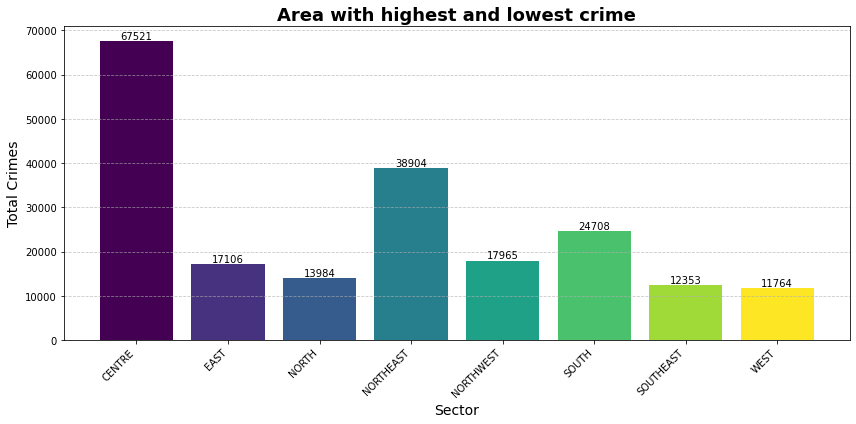

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Create a color palette
colors = plt.cm.viridis(np.linspace(0, 1, len(crime_by_sector)))

# Create bar plot
plt.figure(figsize=(12, 6))
bars = plt.bar(crime_by_sector.index, crime_by_sector, color=colors)

# Add data labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', fontsize=10)

plt.title('Area with highest and lowest crime', fontsize=18, fontweight='bold')
plt.xlabel('Sector', fontsize=14)
plt.ylabel('Total Crimes', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

plt.savefig('Area with highest crime and lowest.png', format='png', dpi=300)
plt.show()

* Visualization using PIE CHART

The below pie chart highlights the percentage of crime count for each sector. We can see in the above pie chart that 33% of crime has occured in the sector "CENTRE" and 5.8% in the "WEST" sector.

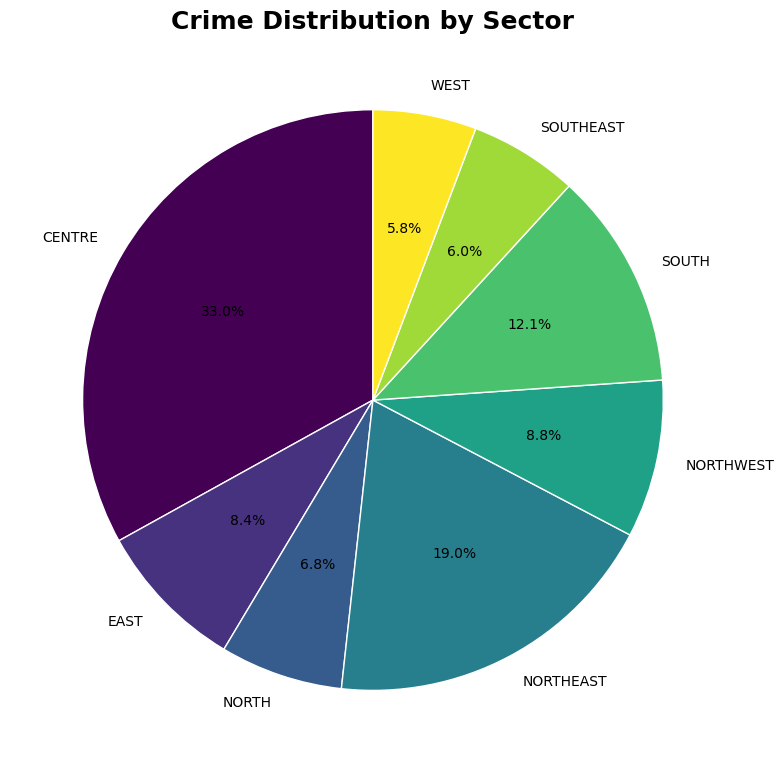

In [28]:
# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(crime_by_sector, labels=crime_by_sector.index, autopct='%1.1f%%', colors=colors, startangle=90, wedgeprops={'edgecolor': 'white'})

plt.title('Crime Distribution by Sector', fontsize=18, fontweight='bold')
plt.tight_layout()

plt.savefig('Crime_Distribution_by_Sector.png', format='png', dpi=300)

plt.show()

### Determine which community has the highest crime for particular sector.

There are over 200 communities in the city of calgary that comes under different sectors. The below code counts the total number of crime count for communities that come under the sector "CENTRE".

In [10]:
# Filtering for a particular sector
sector_filter = 'CENTRE'
filtered_crime_count = community_crimes_sectors[community_crimes_sectors['Sector'] == sector_filter]

# Grouping by 'community' and summing the 'crime count' for that sector
crime_count_by_community_in_sector = filtered_crime_count.groupby('Community')['Crime Count'].sum().reset_index()

print(crime_count_by_community_in_sector)

                    Community  Crime Count
0                    ALTADORE         1051
1            ALYTH/BONNYBROOK          578
2                 BANFF TRAIL         1325
3                    BANKVIEW         1490
4                    BEL-AIRE           57
..                        ...          ...
56                TUXEDO PARK         1659
57          UPPER MOUNT ROYAL          420
58             WEST HILLHURST         1245
59               WINDSOR PARK         1087
60  WINSTON HEIGHTS/MOUNTVIEW         1024

[61 rows x 2 columns]


The below bar graph clearly represents the total crime count by communities that comes under sector "CENTRE". As we can see that the "BELTLINE" community has the highest crime rate i.e 10139 as compare to the other communities.

We have done only for sector "CENTRE". We can also calculate crime count for other communities that comes under different sectors of calgary to check which community has the highest crime rate.

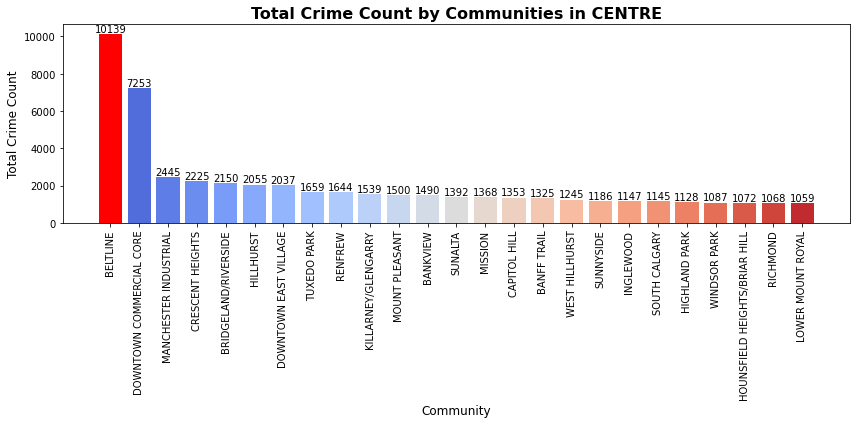

In [11]:
import seaborn as sns

# Selecting the top 25 communities
crime_count_by_community_in_sector = crime_count_by_community_in_sector.sort_values(by='Crime Count', ascending=False).head(25)

colors = sns.color_palette("coolwarm", len(crime_count_by_community_in_sector))

# Plot the bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(crime_count_by_community_in_sector['Community'], crime_count_by_community_in_sector['Crime Count'], color=colors)

plt.title(f'Total Crime Count by Communities in {sector_filter}', fontsize=16, weight='bold')
plt.xlabel('Community', fontsize=12)
plt.ylabel('Total Crime Count', fontsize=12)

plt.xticks(rotation=90)

# Add data labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height - 5, f'{int(height)}', ha='center', va='bottom', color='black', fontsize=10)

# Highlight the community with the highest crime count
highest_crime = max(crime_count_by_community_in_sector['Crime Count'])
highest_community = crime_count_by_community_in_sector['Community'][crime_count_by_community_in_sector['Crime Count'] == highest_crime].values[0]
plt.bar(highest_community, highest_crime, color='red')

plt.tight_layout()
plt.savefig('Top_20_Crime_Count_by_Community_in_NW_Enhanced.png', format='png', dpi=300)
plt.show()


### Identify the types of crimes committed in each sector of Calgary.

Currently, our dataset includes nine crime categories: Assault (Non-domestic), Break & Enter – Commercial, Break & Enter – Dwelling, Break & Enter – Other Premises, Commercial Robbery, Street Robbery, Theft FROM Vehicle, Theft OF Vehicle, and Violence ‘Other’ (Non-domestic). The following charts provide a visual representation of these crimes across different sectors.

The stacked bar chart below clearly shows all crimes committed in each sector, with "Theft FROM Vehicle" having the highest count in all the sectors. We will analyze this further in question 2

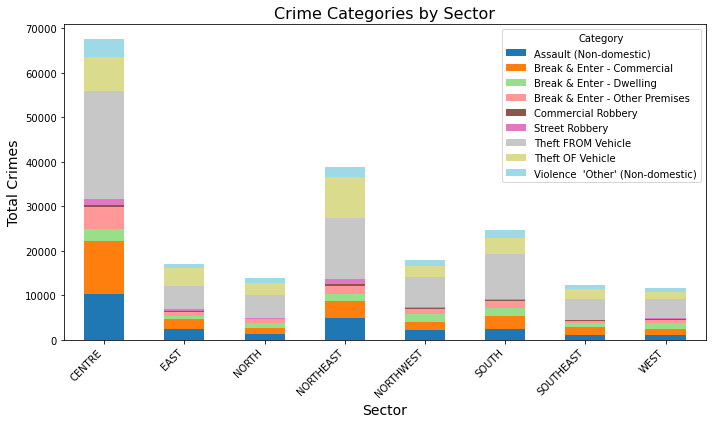

In [12]:
# Group by sector and category, then sum the crime count
crime_by_category_sector = file_read_csv.groupby(['Sector', 'Category'])['Crime Count'].sum().unstack()

# Plot stacked bar chart
crime_by_category_sector.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20')

plt.title('Crime Categories by Sector', fontsize=16)
plt.xlabel('Sector', fontsize=14)
plt.ylabel('Total Crimes', fontsize=14)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('crime category by sectors.png', format='png', dpi=300)
plt.show()

The below heat map clearly highlights the crime count of each category of crimes that occured in the every sector of calgary.

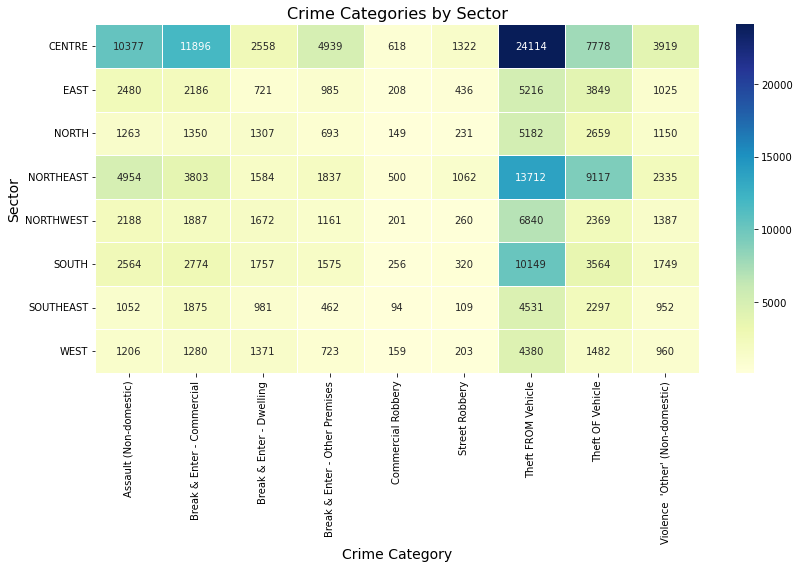

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'crime_by_category_sector' is the DataFrame where sectors are rows and crime categories are columns
plt.figure(figsize=(12, 8))

# Plot heatmap
sns.heatmap(crime_by_category_sector, annot=True, fmt='g', cmap='YlGnBu', linewidths=.5, cbar=True)

plt.title('Crime Categories by Sector', fontsize=16)
plt.xlabel('Crime Category', fontsize=14)
plt.ylabel('Sector', fontsize=14)

plt.tight_layout()
plt.savefig('heatmap_crime_category_by_sectors.png', format='png', dpi=300)

plt.show()

### Question 2: What  are the most common and least common types of crimes?
It is important to gain insights on the most common crimes within the city. This could
help residents take proactive steps to protect themselves. For example, people can decide to improve their vehicle's security systems and adopt safer parking techniques in public areas if they believe that vehicle theft is a serious problem. Furthermore, knowing which crimes are least common can ease some anxieties about certain dangers, enabling a more balanced perspective of safety in the city. Lastly, it mightinfluence government policies regarding public safety. For instance, if theft from a vehicle was the most common crime, they would invest in programs that prevent vehicle crimes. 

In [30]:
# Sort, count and list the crimes in descending order
sorted_crime_counts_desc = crime_counts.sort_values(ascending=False)
sorted_crime_counts_desc


Category
Theft FROM Vehicle                  74124
Theft OF Vehicle                    33115
Break & Enter - Commercial          27051
Assault (Non-domestic)              26084
Violence  'Other' (Non-domestic)    13477
Break & Enter - Other Premises      12375
Break & Enter - Dwelling            11951
Street Robbery                       3943
Commercial Robbery                   2185
Name: Crime Count, dtype: int64

In [37]:
#Calculate the percentages of most and least common types crime out of the total crime counts.
total_count_crime = crime_counts.sum()
#most common crime percentage
most_common_crimepercent =(crime_counts.max()/total_count_crime)*100
#least common crime percentage
most_least_crimepercent =(crime_counts.min()/total_count_crime)*100

most_common_crime_percentage, least_common_crime_percentage

(36.281050390347765, 1.0694794547367905)

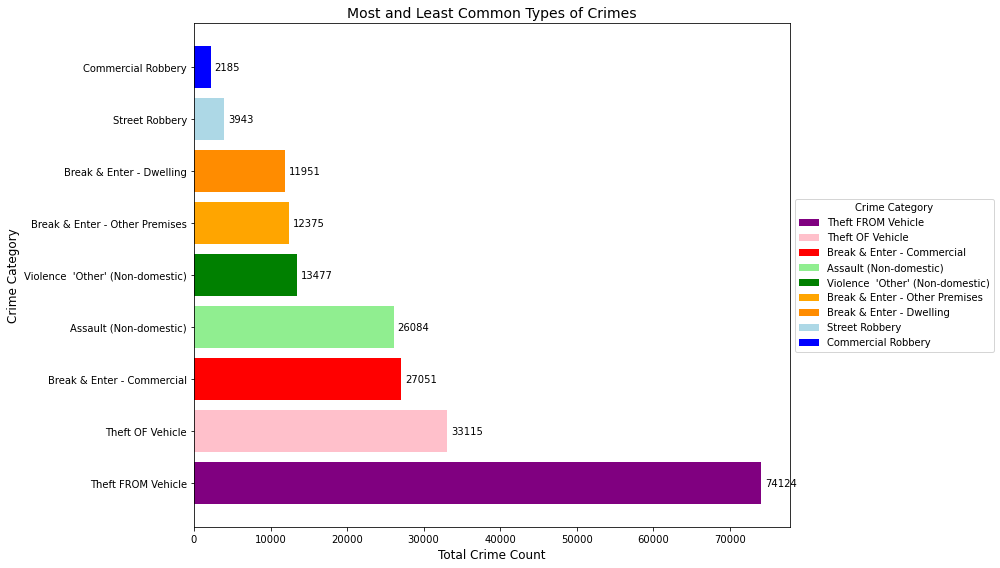

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

#sorting the data
sorted_crime_counts_desc = crime_counts.sort_values(ascending=False)
#bar chart figures
plt.figure(figsize=(14, 8))

#declaring the colors in the chart
colors = ['purple', 'pink', 'red', 'lightgreen', 'green', 'orange', 'darkorange', 'lightblue', 'blue']

# Create a horizontal bar chart
bars = plt.barh(sorted_crime_counts_desc.index, sorted_crime_counts_desc.values, color=colors)

for bar in bars:
    plt.text(bar.get_width() + 500, bar.get_y() + bar.get_height()/2, f'{int(bar.get_width())}', 
             va='center', ha='left', color='black', fontsize=10)

#adding a legend to the bar chart
legend_labels = sorted_crime_counts_desc.index.tolist()
plt.legend(bars, legend_labels, title="Crime Category", loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('Most and Least Common Types of Crimes', fontsize=14)
plt.xlabel('Total Crime Count', fontsize=12)
plt.ylabel('Crime Category', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()


The bar chart above shows a visual representation of most common and least common type of crimes in Calgary. 
The most common type of crime identified in the chart is **Theft FROM Vehicle** with a total count of 74,124  which is **36%** of the total crime count in the dataset
The least common type of crime identified in the visualization is **Commercial Robbery** which represents a count of 2,185 about **1.07%**  of the total crime count in the city.

#### Identifying the most common and the least common type of crime per sector
It's important to look at the most common and the least common types of crimes which are  **Theft FROM Vehicle** and **Commercial Robbery** respectively per sector. Analyzing the counts of these crimes per sector would not only create public awareness about the crimes in each sector but also help alot government resources effectively to combat these crimes.
Below is a visual representation of most common and the least common type of crime per sector

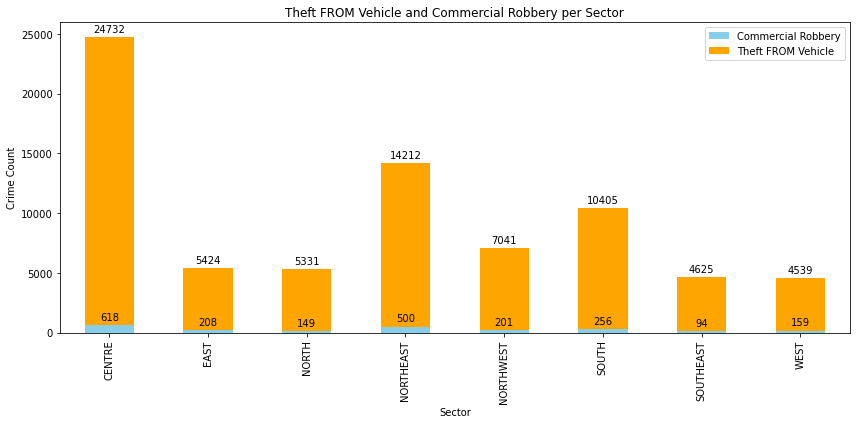

In [47]:

# Filter the data for Theft FROM Vehicle and Commercial Robbery
theft_from_vehicle = data[data['Category'] == 'Theft FROM Vehicle']
commercial_robbery = data[data['Category'] == 'Commercial Robbery']

# Group by Sector and sum the Crime Count
theft_from_vehicle_per_sector = theft_from_vehicle.groupby('Sector')['Crime Count'].sum()
commercial_robbery_per_sector = commercial_robbery.groupby('Sector')['Crime Count'].sum()


combined_data = pd.DataFrame({
    'Commercial Robbery': commercial_robbery_per_sector,
    'Theft FROM Vehicle': theft_from_vehicle_per_sector
}).fillna(0)

# Plot the data in stacked bar chart
ax = combined_data.plot(kind='bar', stacked=True, figsize=(12, 6), color=['skyblue', 'orange'])

# Set chart titles and labels
ax.set_title('Theft FROM Vehicle and Commercial Robbery per Sector')
ax.set_xlabel('Sector')
ax.set_ylabel('Crime Count')


for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=3)  # Position labels above the bars with slight padding

# Display the chart
plt.tight_layout()
plt.show()



From the above visualization, the most common type of crime that is **Theft FROM Vehicle** is highest in the **CENTER** with 24,732 counts and lowest in the **WEST** with 4,539 counts while the least common type of crime is common which is **Commercial Robbery** is the highest in **CENTER** with 618 counts and lowest in **SOUTHEAST** with 94 counts.

#### Comparing Theft FROM Vehicle in Calgary and Theft From Motor Vehicle in Toronto. 
Comparing the most frequent crime in Calgary (theft from vehicles) with another major city like Toronto is crucial, as it helps residents make informed decisions about safer places for themselves and their families. It is also important for the government to adopt better models and strategies from other cities to prevent such crimes.
Below we will use [Theft From Motor Vehicle in Toronto](https://data.torontopolice.on.ca/datasets/TorontoPS::theft-from-motor-vehicle-open-data/about) dataset from Toronto public Safety data portal to analyze the comparison

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Toronto crime dataset into the file
toronto_vehicle_theft = pd.read_csv('Theft_From_Motor_Vehicle_Open_Data_6307943567805975186.csv')

# Display the first 5 rows of the DataFrame
toronto_vehicle_theft.head(5)

,OBJECTID,EVENT_UNIQUE_ID,REPORT_DATE,OCC_DATE,REPORT_YEAR,REPORT_MONTH,REPORT_DAY,REPORT_DOY,REPORT_DOW,REPORT_HOUR,...,OFFENCE,MCI_CATEGORY,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,LONG_WGS84,LAT_WGS84,x,y
0,1,GO-20141261604,1/1/2014 5:00:00 AM,12/31/2013 5:00:00 AM,2014,January,1,1,Wednesday,9,...,Theft From Motor Vehicle Under,NonMCI,164,Wellington Place (164),077,Waterfront Communities-The Island (77),-79.399234,43.642455,-8.838682e+06,5.410277e+06
1,2,GO-20141262668,1/1/2014 5:00:00 AM,12/31/2013 5:00:00 AM,2014,January,1,1,Wednesday,14,...,Theft From Motor Vehicle Under,NonMCI,154,Oakdale-Beverley Heights (154),026,Downsview-Roding-CFB (26),-79.494112,43.723961,-8.849244e+06,5.422823e+06
2,3,GO-20141262199,1/1/2014 5:00:00 AM,12/31/2013 5:00:00 AM,2014,January,1,1,Wednesday,16,...,Theft From Motor Vehicle Under,NonMCI,165,Harbourfront-CityPlace (165),077,Waterfront Communities-The Island (77),-79.398828,43.641423,-8.838637e+06,5.410118e+06
3,4,GO-20141263153,1/1/2014 5:00:00 AM,1/1/2014 5:00:00 AM,2014,January,1,1,Wednesday,21,...,Theft From Motor Vehicle Under,NonMCI,007,Willowridge-Martingrove-Richview (7),007,Willowridge-Martingrove-Richview (7),-79.566007,43.690814,-8.857247e+06,5.417719e+06
4,5,GO-20141261988,1/1/2014 5:00:00 AM,12/31/2013 5:00:00 AM,2014,January,1,1,Wednesday,11,...,Theft From Motor Vehicle Under,NonMCI,168,Downtown Yonge East (168),075,Church-Yonge Corridor (75),-79.376550,43.662052,-8.836157e+06,5.413292e+06


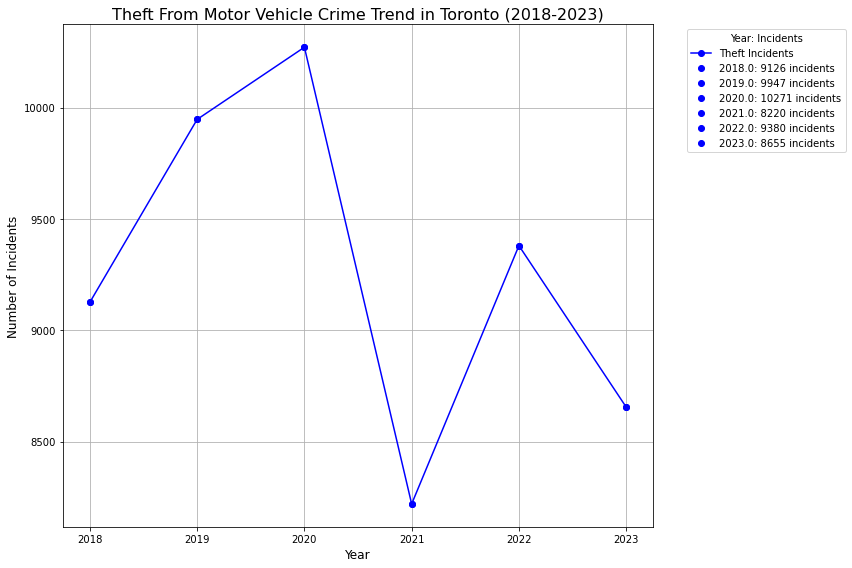

2018.0     9126
2019.0     9947
2020.0    10271
2021.0     8220
2022.0     9380
2023.0     8655
Name: OCC_YEAR, dtype: int64


In [70]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
toronto_vehicle_theft = 'Theft_From_Motor_Vehicle_Open_Data_6307943567805975186.csv'
toronto_data = pd.read_csv(toronto_vehicle_theft)

# Filter data for the years 2018 to 2023
toronto_data['OCC_YEAR'] = pd.to_numeric(toronto_data['OCC_YEAR'], errors='coerce')
filtered_data = toronto_data[(toronto_data['OCC_YEAR'] >= 2018) & (toronto_data['OCC_YEAR'] <= 2023)]

# Group by year and count occurrences
yearly_counts = filtered_data['OCC_YEAR'].value_counts().sort_index()

# Create a line plot
plt.figure(figsize=(12, 8))

# Plot the line with markers
plt.plot(yearly_counts.index, yearly_counts.values, marker='o', color='blue', label='Theft Incidents')

# Add legend entries for each year and count
for year, count in zip(yearly_counts.index, yearly_counts.values):
    plt.plot(year, count, 'o', label=f'{year}: {count} incidents', color='blue')


plt.title('Theft From Motor Vehicle Crime Trend in Toronto (2018-2023)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Incidents', fontsize=12)
plt.grid(True)
plt.xticks(range(2018, 2024))

# Create a legend
plt.legend(title="Year: Incidents", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()

# Print the yearly counts
print(yearly_counts)


The line plot above reveals an interesting trend in Toronto’s **Theft From Motor Vehicle**. As shown in the plot, 2020 had the highest count of incidents, with 10,271 cases, while the lowest occurred in 2021, with 8,220 cases. This is quite surprising, considering the COVID-19 pandemic was ongoing in 2020. Our analysis will explore this further in the subsequent questions.

The line plot below compares **Theft From Motor Vehicle** Toronot and **Theft FROM vehicle** in Calgary 

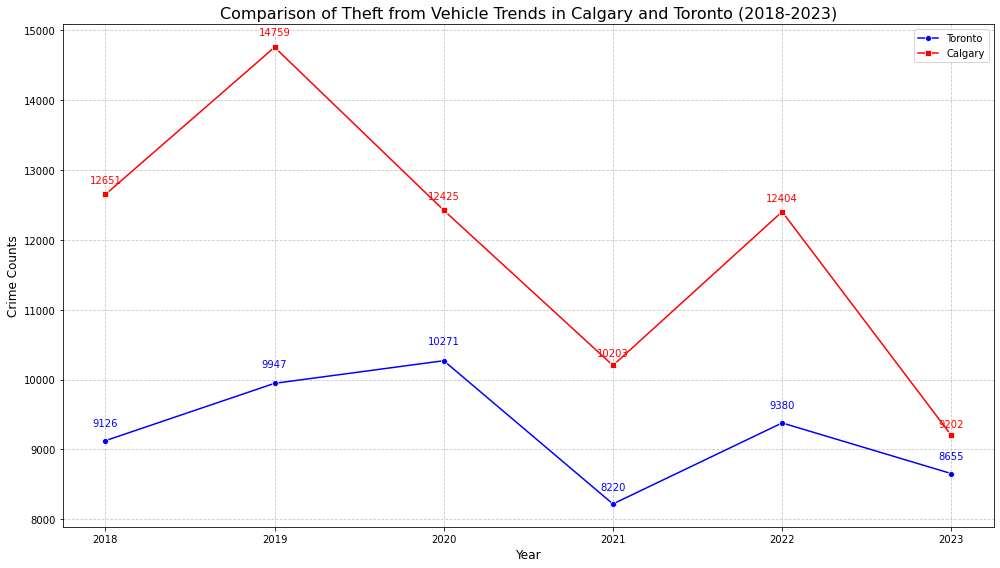

     Year  Toronto Crime Count  Calgary Crime Count
0  2018.0                 9126                12651
1  2019.0                 9947                14759
2  2020.0                10271                12425
3  2021.0                 8220                10203
4  2022.0                 9380                12404
5  2023.0                 8655                 9202


In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and prepare the Toronto theft from motor vehicle dataset

toronto_vehicle_theft = 'Theft_From_Motor_Vehicle_Open_Data_6307943567805975186.csv'
toronto_data = pd.read_csv(toronto_vehicle_theft)
toronto_data['OCC_YEAR'] = pd.to_numeric(toronto_data['OCC_YEAR'], errors='coerce')
toronto_filtered = toronto_data[(toronto_data['OCC_YEAR'] >= 2018) & (toronto_data['OCC_YEAR'] <= 2023)]
toronto_yearly = toronto_filtered['OCC_YEAR'].value_counts().sort_index().reset_index()
toronto_yearly.columns = ['Year', 'Toronto Crime Count']  

# Load and prepare the Community Crime Statistics data
community_data = pd.read_csv("Community_Crime_Statistics.csv") 
community_filtered = community_data[(community_data['Category'] == 'Theft FROM Vehicle') & 
                                    (community_data['Year'] >= 2018) & (community_data['Year'] <= 2023)]
community_yearly = community_filtered.groupby('Year')['Crime Count'].sum().reset_index()
community_yearly.columns = ['Year', 'Calgary Crime Count']

# Merging  the two datasets
combined_data = pd.merge(toronto_yearly, community_yearly, on='Year', how='outer')


# Create the line plot
plt.figure(figsize=(14, 8))
sns.lineplot(data=combined_data, x='Year', y='Toronto Crime Count', marker='o', label='Toronto', color='blue')
sns.lineplot(data=combined_data, x='Year', y='Calgary Crime Count', marker='s', label='Calgary', color='red')

# Customize the plot
plt.title('Comparison of Theft from Vehicle Trends in Calgary and Toronto (2018-2023)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Crime Counts', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)

# Adjust the value labels to be slightly above the points for both Toronto and Calgary
for i, row in combined_data.iterrows():
    if pd.notna(row['Toronto Crime Count']):
        plt.text(row['Year'], row['Toronto Crime Count'] + 0.02 * row['Toronto Crime Count'], f'{int(row["Toronto Crime Count"])}', 
                 ha='center', va='bottom', color='blue')  # Slightly above the point for Toronto
    if pd.notna(row['Calgary Crime Count']):
        plt.text(row['Year'], row['Calgary Crime Count'] + 0.01 * row['Calgary Crime Count'], f'{int(row["Calgary Crime Count"])}', 
                 ha='center', va='bottom', color='red')  # Slightly above the point for Calgary

plt.tight_layout()
plt.show()

# Print the combined data
print(combined_data)


The comparative line plot above highlights the trend of two types of crimes (Theft From vehicle, and Theft from motor Vehicle" from 2018 to 2023 in Calgary and Toronto.From this visualization, we observe the following:

Overall, both cities have experienced a general decline in thefts from vehicles between 2018 and 2023. Calgary consistently had higher rates of vehicle theft compared to Toronto, with the highest incidents recorded in Calgary in 2018. In contrast, Toronto saw has the highest Theft from motor vehicle incidents in 2020.

These trends are intriguing, especially considering that Toronto is one of Canada's largest cities. Based on this comparison, it seems Calgary may need to adopt various policies to combat Theft from vehicle.There are strategies in Toronto  which reflects a proactive approach to reducing Theft from motor vehicle, and some of these could be
beneficial for Calgary if implemented. Here’s a breakdown of the policies and how they might help: [preventive tips](https://www.tps.ca/media-centre/stories/auto-theft-home-invasion-prevention-tips/)

* Suspension of Licenses for Convicted Auto Thieves: By revoking the licenses of repeat offenders, this measure could act as a deterrent for individuals involved in vehicle theft. Calgary could explore adopting a similar policy to discourage offenders.

* Promoting Security Practices: Encouraging citizens to lock their vehicles, activate security systems, and use deterrents like steering-wheel or brake-pedal locks could significantly reduce theft. A public awareness campaign focusing on these measures could be useful in Calgary.

* Use of OBD2 Port Blockers: Since modern vehicle thefts often involve electronic means, blocking access to the vehicle's OBD2 port can prevent thieves from hacking into a car’s system. Calgary could promote the use of such devices to address the tech-savvy nature of some vehicle crimes.

* Visible or Audible Security Devices: Installing alarms or other devices that signal a car is secured can reduce theft rates by making vehicles less appealing to thieves. Providing incentives for installing such systems could be an effective prevention method.

* Improving Public Transportation: Enhancing the accessibility and efficiency of public transportation can reduce the reliance on personal vehicles, which may indirectly reduce the prevalence of vehicle thefts. Calgary might consider investing more in its public transport infrastructure as a long-term solution.

Key Takeaway and Conclusion:

The comparison between Calgary and Toronto reveals that both cities face significant challenges with theft from vehicle. While researching the factors that might contribute to Calgary’s higher rate of theft from vehicles compared to Toronto, I found no reliable sources to support this observation. It remains a mystery why the crime rate remained high, even during the COVID-19 years of 2019-2020 as well.

Overall, these insights are valuable. If Calgary adopts proactive measures similar to those implemented in Toronto, it might help reduce theft from vehicle. A combination of stricter legal consequences, increased public awareness, and innovative security measures will likely strengthen Calgary’s efforts to combat the most common crime which is theft from vehicle more effectively.

### Referneces
Toronto Policy; Public safety data portal       https://data.torontopolice.on.ca/pages/8ff3a713c0c94c4682245f58eba895b2



INTRODUCTION - Impacts of Covid-19 on crime in Vancouver and Calgary

The motivation behind this part of our analysis, will be to draw conclusions if the lockdowns during Covid-19 had any impact on the total number of 
crimes in Calgary and Vancouver. Intitially, without visualizing any of the data, you probably would guess that since people were forced to stay inside
for the lockdowns that crime significantly decreased. We already know that crimes including a vehicle are incredibly high in Calgary however during 
lockdown, most people would have stopped using their cars as much and would be keeping them in their garages. This would mean that criminals now have
fewer vehicles on the street to break into and for all other types of crime, there will be less people on the street to be a criminals victim. 
However, you can also think of this same situation in a very opposite opinion. Most criminals would most likely not commit any crimes when people are 
near by and can see the crime occuring. Which means that if there are significantly less people on the street, criminals can do whatever they like and
only cameras would catch them. A lot of businesses also had to shut down and they most likely did not have someone constantly at the physical store
location making sure that no one was breaking in or stealing anything. Therefore, the lockdowns could potentially have been a criminals best dream. 

During our intital project pitch, many students were asking us why exactly we chose to look into Vancouver as a comparison for this specific analysis.
To be completely honest, one of the biggest challenges with this analysis was finding a dataset of crime that was easy to pull from the eternet and
had similar crimes tracked than the Calgary dataset we already had. Initially, I had datasets from cities all across Canada but many of them were so large
and had such different formats, that I was not able to load them into jupyter without doing a ton of work manipulating the data in the excel file. 

The objective of this analysis will be to conclude if lockdown during 2020 and 2021 had any impact on the crime rates in Calgary. Specifically, 
we will be looking at three different lockdown phases which were March 2020 to May 2020, November 2020 to January 2021, and April 2021 to June 2021. 
For our Vancouver dataset, we will be asking the same question however we will be using slightly different time periods since they had different 
lockdowns than Calgary. The first two lockdowns during March 2020 to May 2020 and November 2020 to January 2021 are the exact same. However,
the third lockdown period was from March 2021 to June 2021. 



In [9]:
'''
DATASET and GUIDING QUESTION - Impacts of Covid-19 on crime in Vancouver and Calgary

For this analysis, we will be using the original Community Crime Statistics from 
https://data.calgary.ca/Health-and-Safety/Community-Crime-Statistics/78gh-n26t/about_data. We will not be using any of the columns for community since
it does not fully fit into the specific question asked in this analysis. It is important to note the use licensing of our Calgary dataset which
can be found at https://data.calgary.ca/stories/s/Open-Calgary-Terms-of-Use/u45n-7awa. As stated in the link, the information provider grants us a
worldwide, royalty-free, perpetual, non-exclusive license to use the information, including for commercial purposes, subject to terms. Those terms are
that we are free to copy, modify, publish, translate, adapt, distribute or otherwise use the Information in any medium, mode or format for any lawful 
purpose as long as we acknowledge the source of the information by including any attribution statement specified by the information provider and, 
where possible, provide a link to this license.

For our Vancouver dataset, we have pulled data from every year possible from the Vancouver Police Department at 
https://geodash.vpd.ca/opendata/. It is stated on this site that anyone can use the data and that the user agrees and understands 
that neither the Vancouver Police Department, Vancouver Police Board nor the City of Vancouver assumes liability for any decisions made or actions 
taken or not taken by the user in reliance upon any information or data provided.


'''

#Here is the structure and format of both our datasets

import pandas as pd

calgary_data = pd.read_csv('Calgary.csv')
vancouver_data = pd.read_csv('Vancouver.csv')

print("Calgary dataset:")
print(calgary_data.head()) 
print("\nVancouver dataset:")
print(vancouver_data.head()) 

print("\nCalgary data types:")
print(calgary_data.dtypes)
print("\nVancouver data types:")
print(vancouver_data.dtypes)

#As shown with our code, the Calgary dataset has the location in Calgary under community, the type of crime under category, the number of that specific
#crime for that specific month and year under crime count, and year and month. 

#For our vancouver dataset, it has the type of crime under type, and then the year, month, and date. 
#The types of crimes are very similar across the Calgary and Vancouver dataset. We will discuss the differences further when we breakdown the types of
#crimes that continued to exist during the lockdowns later in this analysis. 

'''
Noteworthy Challenges:

There were three large challenges I faced when working on this analysis. Those three challenges were that the Vancouver and Calgary datasets are slightly
setup differently, I needed to combine the datasets to draw any conclusions, and the population sizes of the two cities are different. 

1. Both datasets are setup differently:
 One of the biggest challenges for this analysis was that our Calgary dataset breaks each crime down into the specific month and year. Therefore, each
 specific crime has a total count for that specific month. For example, our 5 row displayed in our Calgary.head() output shows that there were two 
 commercial break and enters in 2020 during July. Our Vancouver dataset captures the specific days so each row is a different count for a crime during
 that day. Before I could do any analysis, I needed to combine all of the individual days in our Vancouver dataset, into sums for each month so that
 we could easily compare with the Calgary dataset. 

2. Combination of datasets:
 We also have different crimes captured in each dataset. In our Vancouver dataset, we capture homicide, mischief, and car collisions which are not
 captured in our Calgary dataset. However, for most of our analysis we dont need to filter the data to match since we want to see how the crime numbers
 increase or decrease during lockdown across both cities. Whenever I make a specific comparison, I needed to filter the data to match. It was 
 very difficult to research and figure out what different types of crimes meant and if they were the same thing in both cities. For example, our Calgary
 dataset has assult (non domestic), however our Vancouver dataset has offence against a person. Our Calgary dataset does not capture domestic assult 
 but we are not able to seperate that in our Vancouver dataset. Therefore, I needed to keep in mind that not all of our data matches exactly. 

3. The populations do not match
 When we did our initial project pitch, the most amount of comments we received were on how we were comparing both cities. This created problems because
 it made a lot of sense for any direct comparisons but did not make sense for our overall question. In this entire project, we are interested in what
 the safest locations are in Calgary and across Canada are. Therefore, when we compare the number of crimes in Calgary to Vancouver divided by their 
 population sizes, it only tells us how each city compares with how dangerous their population is. If one city had more crimes per population, that 
 simply means that there are more crimes happening accounting for population size. However, we are interested in how safe each city is which means that
 the total number of crimes is the most important statistic regardless of population. If you live in the same size city and one city has more people, it
 doesnt really matter if there are more or less crimes per population than another location since if more crimes happen in that city, there are simply
 more crimes to be careful of. 

'''

'''
Guiding Question:

Did the lockdowns during Covid-19 have an impact on the total number of crimes seen in Calgary and Vancouver?

We are specifically interested in:
The number of crimes that increased or decreased during lockdown months

The team member responsible for our Covid-19 question is Matias Totz.
'''





Calgary dataset:
  Community                    Category  Crime Count  Year  Month
0       01B      Assault (Non-domestic)            1  2022     11
1       01B  Break & Enter - Commercial            1  2019      6
2       01B  Break & Enter - Commercial            1  2019      8
3       01B  Break & Enter - Commercial            2  2020      3
4       01B  Break & Enter - Commercial            2  2020      7

Vancouver dataset:
                       TYPE  YEAR  MONTH  DAY
0  Offence Against a Person  2020      7   31
1  Offence Against a Person  2018      8   26
2  Offence Against a Person  2022      9   23
3  Offence Against a Person  2007      8   22
4  Offence Against a Person  2006      3   21

Calgary data types:
Community      object
Category       object
Crime Count     int64
Year            int64
Month           int64
dtype: object

Vancouver data types:
TYPE     object
YEAR      int64
MONTH     int64
DAY       int64
dtype: object


'\nGuiding Question:\n\nDid the lockdowns during Covid-19 have an impact on the total number of crimes seen in Calgary and Vancouver?\n\nWe are specifically interested in:\n1. The number of crimes that increased or decreased during lockdown months\n2. If any categories of crimes stopped to exist during lockdown months\n\nThe team member responsible for our Covid-19 question is Matias Totz.\n'

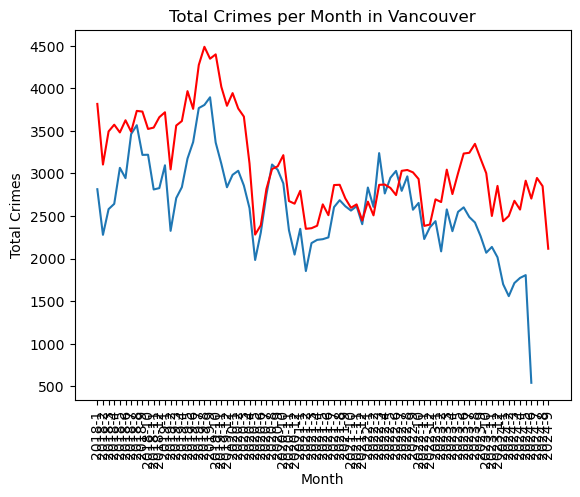

Empty DataFrame
Columns: [TYPE, YEAR, MONTH, DAY, Crime Count]
Index: []


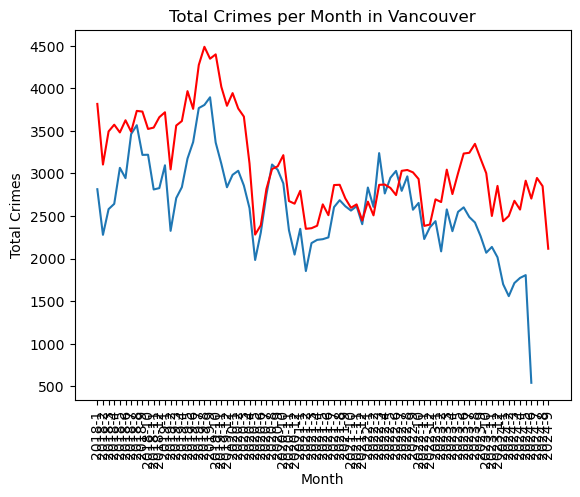

In [49]:
#DATA EXPLORATION - Impacts of Covid-19 on crime in Vancouver and Calgary

#The first step of our data cleaning will be to group our Calgary data by the year and month combined

import pandas as pd
import matplotlib.pyplot as plt

calgary_grouped = calgary_data.groupby(['Year', 'Month'])['Crime Count'].sum().reset_index()

plt.plot(calgary_grouped['Year'].astype(str) + '-' + calgary_grouped['Month'].astype(str), calgary_grouped['Crime Count'])

plt.xlabel('Month')
plt.ylabel('Total Crimes')
plt.title('Total Crimes by Month in Calgary')
plt.xticks(rotation=90)

#Our vancouver dataset has days for each row so we need to combine them all into months

vancouver_data['Crime Count'] = 1  
vancouver_data = vancouver_data[(vancouver_data['YEAR'] >= 2018) & (vancouver_data['YEAR'] <= 2024)]
vancouver_grouped = vancouver_data.groupby(['YEAR', 'MONTH'])['Crime Count'].sum().reset_index()


plt.plot(vancouver_grouped['YEAR'].astype(str) + '-' + vancouver_grouped['MONTH'].astype(str), vancouver_grouped['Crime Count'],color='red')

plt.xlabel('Month')
plt.ylabel('Total Crimes')
plt.title('Total Crimes per Month in Vancouver')
plt.xticks(rotation=90)
plt.show()


#From this graph, we can see that months are pretty similar in the crime trends in both cities. Vancouver for the most part has more crimes in each month
#however the Vancouver dataset also contains more types of crimes so we need to clean those out

#Specifically, we need to remove murder and any crimes relating to collisions

calgary_grouped = calgary_data.groupby(['Year', 'Month'])['Crime Count'].sum().reset_index()

plt.plot(calgary_grouped['Year'].astype(str) + '-' + calgary_grouped['Month'].astype(str), calgary_grouped['Crime Count'])

plt.xlabel('Month')
plt.ylabel('Total Crimes')
plt.title('Total Crimes by Month in Calgary')
plt.xticks(rotation=90)


vancouver_data = vancouver_data[~vancouver_data['TYPE'].isin(['Homicide', 'Vehicle Collision or Pedestrian Struck (with Fatality)', 
                                                              'Vehicle Collision or Pedestrian Struck (with Injury)' ])]
print(vancouver_data[vancouver_data['TYPE'] == 'Homicide'])

vancouver_data['Crime Count'] = 1  
vancouver_data = vancouver_data[(vancouver_data['YEAR'] >= 2018) & (vancouver_data['YEAR'] <= 2024)]
vancouver_grouped = vancouver_data.groupby(['YEAR', 'MONTH'])['Crime Count'].sum().reset_index()


plt.plot(vancouver_grouped['YEAR'].astype(str) + '-' + vancouver_grouped['MONTH'].astype(str), vancouver_grouped['Crime Count'],color='red')

plt.xlabel('Month')
plt.ylabel('Total Crimes')
plt.title('Total Crimes per Month in Vancouver')
plt.xticks(rotation=90)
plt.show()

#As we can see from comparing both graphs, it does not seem like the murders and collisions had a big impact since both graphs look the exact same



Empty DataFrame
Columns: [TYPE, YEAR, MONTH, DAY, Crime Count, Lockdown]
Index: []


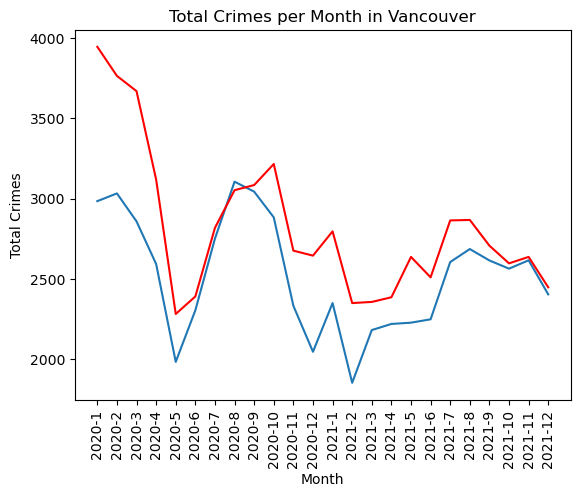

  Community                    Category  Crime Count  Year  Month  Lockdown
3       01B  Break & Enter - Commercial            2  2020      3         1
4       01B  Break & Enter - Commercial            2  2020      7         0
5       01B  Break & Enter - Commercial            1  2020      8         0
6       01B  Break & Enter - Commercial            1  2020     11         1
7       01B  Break & Enter - Commercial            1  2020     12         1
                        TYPE  YEAR  MONTH  DAY  Crime Count  Lockdown
0   Offence Against a Person  2020      7   31            1         0
9   Offence Against a Person  2020     12   20            1         1
26  Offence Against a Person  2021      3    7            1         0
31  Offence Against a Person  2020      2    2            1         0
44  Offence Against a Person  2021      9    1            1         0
2318.0
2641.9333333333334
2746.4444444444443
2872.9333333333334
323.9333333333334
126.48888888888905


In [165]:
#Now we need to determine which years to use for our analysis. Since we only have two years (2020 and 2021) that have both lockdown and non lockdown
#months, we should only be using those years. It is not fair to compare 2018 to 2020 since 2018 did not have any lockdown months and therefore,
#we can not make a solid conclusion if lockdown had an impact on crime. We need to compare lockdown months to the most recent non lockdown months
#since crime has been slowly decreasing since 2018.

calgary_data = calgary_data[(calgary_data['Year'] >= 2020) & (calgary_data['Year'] <= 2021)]
calgary_grouped = calgary_data.groupby(['Year', 'Month'])['Crime Count'].sum().reset_index()

plt.plot(calgary_grouped['Year'].astype(str) + '-' + calgary_grouped['Month'].astype(str), calgary_grouped['Crime Count'])

plt.xlabel('Month')
plt.ylabel('Total Crimes')
plt.title('Total Crimes by Month in Calgary')
plt.xticks(rotation=90)

#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isin.html

vancouver_data = vancouver_data[~vancouver_data['TYPE'].isin(['Homicide', 'Vehicle Collision or Pedestrian Struck (with Fatality)', 
                                                              'Vehicle Collision or Pedestrian Struck (with Injury)' ])]
print(vancouver_data[vancouver_data['TYPE'] == 'Homicide'])

vancouver_data['Crime Count'] = 1  
vancouver_data = vancouver_data[(vancouver_data['YEAR'] >= 2020) & (vancouver_data['YEAR'] <= 2021)]
vancouver_grouped = vancouver_data.groupby(['YEAR', 'MONTH'])['Crime Count'].sum().reset_index()

plt.plot(vancouver_grouped['YEAR'].astype(str) + '-' + vancouver_grouped['MONTH'].astype(str), vancouver_grouped['Crime Count'],color='red')

plt.xlabel('Month')
plt.ylabel('Total Crimes')
plt.title('Total Crimes per Month in Vancouver')
plt.xticks(rotation=90)
plt.show()


#Now that we have only 2020 and 2021, lets manipulate our data so we can flag the months that had lockdowns and compare the crimes in lockdown months
#against non lockdown months

lockdowns = [(2020, 3, 5), (2020, 11, 12),  (2021, 1, 1), (2021, 4, 6)]

def is_lockdown(year, month, lockdowns):
    for months in lockdowns:
        if months[0] == year and months[1] <= month <= months[2]:
            return 1 
    return 0 

calgary_data['Lockdown'] = calgary_data.apply(lambda row: is_lockdown(row['Year'], row['Month'], lockdowns), axis=1)


lockdowns_van = [(2020, 3, 5), (2020, 11, 12),  (2021, 1, 1), (2021, 4, 7)]
vancouver_data['Lockdown'] = vancouver_data.apply(lambda row: is_lockdown(row['YEAR'], row['MONTH'], lockdowns), axis=1)

print(calgary_data.head())
print(vancouver_data.head())

#As we can see from the graph, results are most obvious during the first lockdown. This is most likely because that was the strictist lockdown period
#and the two other periods afterwards were less strict. 

#Now lets see if there is a difference in the average crime counts of lockdown months compared to non lockdown months

#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html

def calculate_mean_crime(data, year_col, month_col):
    filtered_data = data[(data[year_col] >= 2020) & (data[year_col] <= 2021)]
    monthly_data = filtered_data.groupby([year_col, month_col])['Crime Count'].sum().reset_index()
    monthly_data = monthly_data.merge(filtered_data[[year_col, month_col, 'Lockdown']].drop_duplicates(), on=[year_col, month_col], how='left')
    lockdown_mean = monthly_data[monthly_data['Lockdown'] == 1]['Crime Count'].mean()
    non_lockdown_mean = monthly_data[monthly_data['Lockdown'] == 0]['Crime Count'].mean()

    return lockdown_mean, non_lockdown_mean

lockdown_mean_calgary, non_lockdown_mean_calgary = calculate_mean_crime(calgary_data, 'Year', 'Month')
difference_calgary = non_lockdown_mean_calgary - lockdown_mean_calgary
lockdown_mean_vancouver, non_lockdown_mean_vancouver = calculate_mean_crime(vancouver_data, 'YEAR', 'MONTH')
difference_vancouver = non_lockdown_mean_vancouver - lockdown_mean_vancouver

print(lockdown_mean_calgary)
print(non_lockdown_mean_calgary)
print(lockdown_mean_vancouver)
print(non_lockdown_mean_vancouver)

print(difference_calgary)
print(difference_vancouver)
#On average, during 2020 and 2021, Calgary had 324 less crimes during lockdown months and vancouver had 126 less crimes.

#This means that in fact, lockdown months did significantly impact the crime rates in Calgary and Vancouver. They helped reduce the total number of crimes
#which makes a ton of sense. What is really interesting, is that the average crime only dropped by 324 and 126 since that is not a very high number.
#For reference, the actual average crimes were close to 3000 for the months so a drop in only 300 or 100 is really not that high. 

In [155]:
#Now we need to insure that there is an actual relationship between lockdowns and the total crimes. If there is no correlation, then we cant
#say that the lockdowns were one of the main variables in the decrease in crimes

#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html

calgary_total_crimes = calgary_data.groupby(['Year', 'Month'])['Crime Count'].sum().reset_index()
calgary_total_crimes = calgary_total_crimes.merge(calgary_data[['Year', 'Month', 'Lockdown']].drop_duplicates(), on=['Year', 'Month'], how='left')

vancouver_total_crimes = vancouver_data.groupby(['YEAR', 'MONTH'])['Crime Count'].sum().reset_index()
vancouver_total_crimes = vancouver_total_crimes.merge(vancouver_data[['YEAR', 'MONTH', 'Lockdown']].drop_duplicates(), on=['YEAR', 'MONTH'], how='left')

#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html

calgary_correlation = calgary_total_crimes['Lockdown'].corr(calgary_total_crimes['Crime Count'])
print(calgary_correlation)

vancouver_correlation = vancouver_total_crimes['Lockdown'].corr(vancouver_total_crimes['Crime Count'])
print(vancouver_correlation)

#As we can see, the correlation between lockdown and total crimes is negative in both cities however, it is a stronger relationship in Calgary than
#in Vancouver. Both relationships are not incredibly strong which would suggest that a few other variables were involved. 

-0.45161971832586684
-0.1375528285148644


Category    Lockdown  Theft FROM Vehicle  Theft OF Vehicle
Year Month                                                
2020 1             0                1172               510
     2             0                1207               448
     3             1                1082               469
     4             1                1068               427
     5             1                 795               260
     6             0                 822               296
     7             0                1078               362
     8             0                1187               384
     9             0                1227               414
     10            0                1225               418
     11            1                 884               356
     12            1                 678               360
2021 1             1                 821               441
     2             0                 617               381
     3             0                 851               3

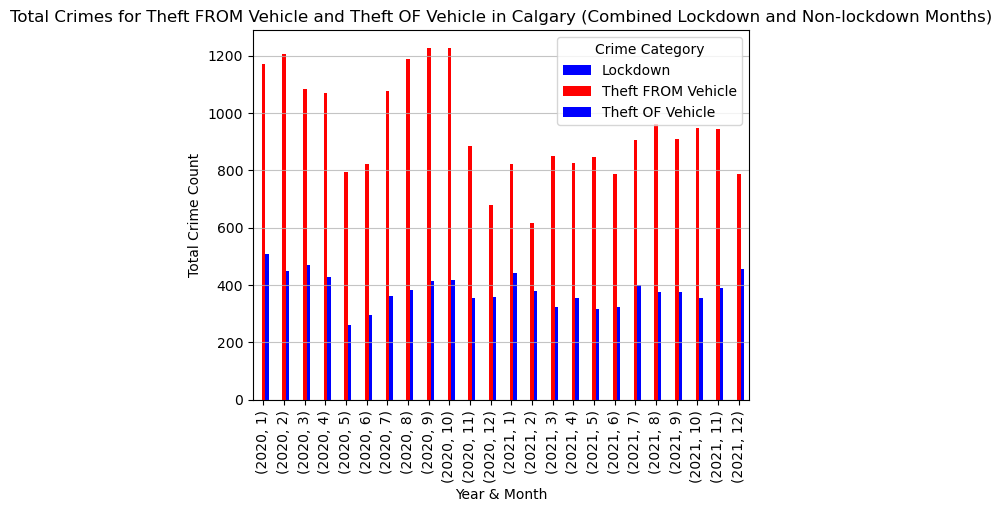

In [161]:
#As we found out earlier in our project, crimes including a vehicle are very popular in Calgary and are in fact the most popular crime. 
#I want to specifically see if these crimes decreased or increased during lockdowns since people most likely would be using their cars less
#and they would be storing them in garages instead of on the street.

import pandas as pd
import matplotlib.pyplot as plt

calgary_data['Crime Count'] = pd.to_numeric(calgary_data['Crime Count'])

filtered_calgary = calgary_data[(calgary_data['Year'].isin([2020, 2021])) & (calgary_data['Category'].isin(['Theft FROM Vehicle', 'Theft OF Vehicle']))]

monthly_crimes = filtered_calgary.groupby(['Year', 'Month', 'Lockdown', 'Category'])['Crime Count'].sum().unstack(fill_value=0)
monthly_crimes_reset = monthly_crimes.reset_index()

combined_monthly_crimes = monthly_crimes_reset.groupby(['Year', 'Month']).sum()
print(combined_monthly_crimes)

combined_monthly_crimes.empty:  combined_monthly_crimes.plot(kind='bar', color=['blue', 'red'])
    
plt.title('Total Crimes for Theft FROM Vehicle and Theft OF Vehicle in Calgary (Combined Lockdown and Non-lockdown Months)')
plt.xlabel('Year & Month')
plt.ylabel('Total Crime Count')
plt.xticks(rotation=90)  
plt.legend(title='Crime Category')
plt.grid(axis='y', alpha=0.75)
plt.show()

#We can definetly see that during the lockdowns, there is a slight decrease in car related crimes in Calgary



DISCUSSION -  Impacts of Covid-19 on crime in Vancouver and Calgary

There were a few major findings in this analysis regarding the impacts of lockdowns on total crimes in Calgary and Vancouver. As we saw in the first piece of this analysis, we were able to show that crimes during lockdowns did, in fact, decrease. We found that on average, lockdown months in Calgary had roughly 300 fewer crimes, while Vancouver had roughly 100 fewer crimes. Now, what is really interesting is that the average number of crimes in Calgary during non-lockdown months was 2,600, and Vancouver had 2,900 crimes. This makes a decrease of only 300 and 100 crimes seem really small. What is also interesting is that Calgary had a significantly larger decrease in crimes during their lockdown months than Vancouver did. This might suggest that the Calgary government did a better job of enforcing rules or had stricter regulations that limited people's ability to go outside.

We also examined the correlation between lockdowns and total crimes, where we saw promising results. Although they both had relatively weak correlations, they were both negatively correlated. Calgary's correlation was also significantly higher than Vancouver's, which again suggests that Calgary may have had a more effective lockdown policy.

It is very difficult to conclude that the lockdowns had a direct impact on decreasing total crimes since both cities have slowly been getting safer since 2018. When you look at the graph of total crimes per month from 2018 to 2024, we can see that both cities are rapidly declining in total crimes. This makes it tougher to conclude that lockdowns were the sole variable in making those specific months safer; however, I believe we can conclude that lockdowns were one of the key variables.

When we looked at vehicle-related crimes in Calgary during lockdowns, we were able to conclude that they did, in fact, decrease during lockdowns. It is very clear that vehicle-related crimes dropped during the first lockdown period. The two following periods also show decreased crimes, but it is much harder to tell. When we look at theft of vehicles in blue, we can see downward bumps during the three lockdown periods. However, theft from vehicles is much tougher to assess. We can see that, in general, the lockdown periods had fewer thefts from vehicles, but it is not as obvious. This result makes complete sense since people spent more time at home and therefore spent less time driving around. Additionally, people also started to work from home, so they were most likely able to park their cars in safer spots, like their garages.


LEARNING - Impacts of Covid-19 on crime in Vancouver and Calgary

There were a few key lessons I learned from doing the analysis on lockdowns. I am really glad that as part of our project, we were forced to do a project pitch where we were able to get feedback from other students and also see how other groups were approaching their projects. I took an entrepreneurship course in university, and my professor would always say that before building any business, you need to pitch your idea to people and see what their reactions and feedback are. I have done many projects like this before, and I have never done a pitch where I got feedback before finishing the entire project. I found it to be super helpful to see what other students are interested in and what they wanted changed in my analysis. I would not have created as good of an analysis without the feedback from my classmates. For example, I pitched the idea that I was going to compare Canada to the USA; however, many students voiced their concerns that this would be out of the scope of the project, especially since the USA would most likely have a different criminal system and would have different types of crimes, which would have made our data cleaning a nightmare.

Another key lesson I took away was that I should have done some exploratory analysis before picking my question. I did not check for correlation and relationships between variables until I started the final piece of the project. If I had started off the project by exploring the data and checking for strong relationships first, I could have ended up with stronger results. In our conclusion, we found that lockdowns did decrease the total crimes; however, it was weakly correlated and only decreased the total crimes by a very small number. This leads me to my next big lesson learned, which was that we cannot conclude that our results from the lockdown analysis were strong enough. As I mentioned before, the total crimes have been decreasing ever since 2018. Originally, I wanted to explore if COVID-19 was the main factor in this downward trend; however, I realized that there are simply too many factors at play. I honestly have no clue why the total crimes in Calgary and Vancouver have been decreasing, and I would not know how to even start exploring if COVID-19 was a main factor.


# References


* [1] youmoveme, “6 ways to learn about a new city before you move”, youmoveme.com, May 25, 
2023. [Online]. Available: https://youmoveme.com/blog/6-ways-to-learn-about-a-new-citybefore-you-move/. [Accessed Sept. 21, 2024].  


* [2] The City of Calgary,, “City of Calgary’s Open Data Portal,” data.calgary.ca, 2024. [Online]. Available: https://data.calgary.ca/. [Accessed Sept. 21, 2024].  
 
* [3] The City of Calgary, “Community Crime Statistics,” https://data.calgary.ca, Sept. 16, 2024. [Online]. Available: https://data.calgary.ca/Health-and-Safety/Community-Crime-Statistics/78ghn26t/about_data. [Accessed Sept. 21, 2024].  


* [4] The City of Calgary, “Community Sectors,” opencalgary.com, Feb. 1, 2023. [Online]. Available: https://data.calgary.ca/Base-Maps/Community-Sectors/mz2j-7eb5/about_data 
[Accessed Sept. 21, 2024].  


* [5] Manengadan, M, Nandanan, S, & Subash, N., “Crime Data Analysis, Visualization and Prediction Using LSTM”: https://www.researchgate.net/publication/354634238_Crime_Data_Analysis_Visualization_and_Prediction_Using_LSTM [ accessed Aug. 05, 2021. 